# Image_Classification_on_MNIST Data Set

In [4]:
import tensorflow as tf

In [3]:
56+4

60

Loading the Data from MNIST

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train,y_train), (X_test, y_test)= mnist.load_data()

In [7]:
print (X_train.shape,y_train.shape, X_test.shape, y_train.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (60000,)


In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Scaling the Data

In [9]:
X_train, X_test= X_train/255, X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
import matplotlib.pyplot as plt

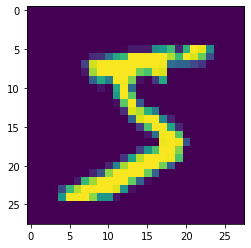

In [12]:
plt.imshow(X_train[0]) # It will give Heatmap of the first image's data
plt.show()

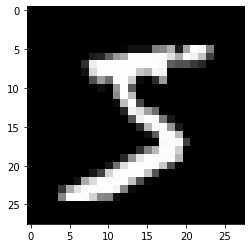

In [13]:
plt.imshow(X_train[0], cmap = 'gray') # It will give output in the grey Scale 
plt.show()

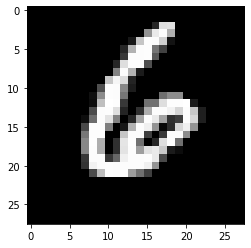

In [14]:
plt.imshow(X_train[13], cmap ='gray')
plt.show()

We know that we have to give i/p in the format of 2D for Tensorflow. But here we will not be converting i/p data to a 2D Matrice of dimension NxD before passing into a NN. 

Instead, tf.keras layer can handle this flattening for us. It converts nx28x28 to Nx784, which is a 2D Matrix.

### Building the Model 

In [15]:
model = tf.keras.Sequential ([ tf.keras.layers.Flatten(input_shape = (28,28)), # Our each image is  in the dimension of 28x28
                              tf.keras.layers.Dense(128, activation = 'relu'), # Using Relu as activation function of Dense layer
                              tf.keras.layers.Dropout(0.2), # Setting dropout in  Dense Layer as 20%
                              tf.keras.layers.Dense (10, activation = 'softmax')# Using softmax as activation function on Output Layer
                              
    
])

Compling the Model

In [16]:
model.compile(optimizer = 'adam', 
               loss = 'sparse_categorical_crossentropy', # https://vitalflux.com/keras-categorical-cross-entropy-loss-function/#:~:text=sparse_categorical_crossentropy%3A%20Used%20as%20a%20loss,just%20has%20a%20different%20interface.
               metrics = ['accuracy'])
#  Traditional categorical crossentropy requires that your data is one-hot encoded and hence converted into categorical format.

#sparse_categorical_crossentropy: Used as a loss function for multi-class classification model where the output label is assigned integer value (0, 1, 2, 3…). 
#This loss function is mathematically same as the categorical_crossentropy'''

In [17]:
# Fitting the model on our Data
r = model.fit (X_train, y_train, validation_data =(X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 39s 12ms/step - loss: 0.2996 - accuracy: 0.9125 - val_loss: 0.1427 - val_accuracy: 0.9568
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1453 - accuracy: 0.9567 - val_loss: 0.0996 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1085 - accuracy: 0.9671 - val_loss: 0.0861 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0895 - accuracy: 0.9726 - val_loss: 0.0831 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0760 - accuracy: 0.9761 - val_loss: 0.0753 - val_accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0655 - accuracy: 0.9789 - val_loss: 0.0765 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0592 - accuracy: 0.9809 - val_loss: 0.0710 - 

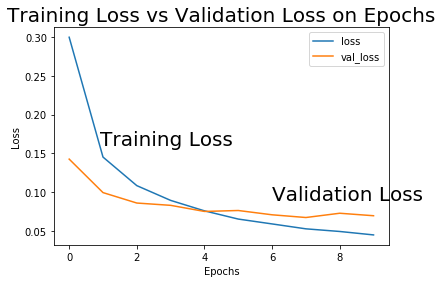

In [18]:
#Loss
plt.plot (r.history ['loss'], label ='loss')
plt.plot (r.history ['val_loss'], label ='val_loss')

plt.title(r'Training Loss vs Validation Loss on Epochs', fontsize=20)
plt.text(0.9, 0.16, r'Training Loss', fontsize=20)
plt.text(6, 0.09, r'Validation Loss',fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

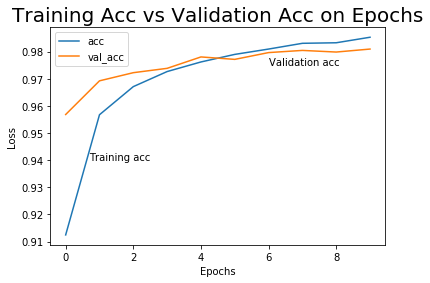

In [19]:
# Accuracy
plt.plot (r.history ['accuracy'], label ='acc')
plt.plot (r.history ['val_accuracy'], label ='val_acc')

plt.title(r'Training Acc vs Validation Acc on Epochs', fontsize=20)
plt.text(0.70, 0.94, r'Training acc', fontsize=10)
plt.text(6, 0.975, r'Validation acc',fontsize=10)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Observation: Yes, the accuracy is pretty high , almost between 97-98%.

In [20]:
# Evaluate the model

print(model.evaluate(X_test, y_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.0698 - accuracy: 0.9809
[0.06975570321083069, 0.98089998960495]


If we observe, the steps are quite similar to our previous NBs. Therefore, we say that these steps are model-agnostic(they dont care what the actual form of the model is).

Only what changes is the way we have built the model because in Tensorflow, we have to actually build the model.